Question 1 : What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.
(Hint: Compare their scope, techniques, and applications for each.)

Answer:-
1. Artificial Intelligence (AI)

Scope: The broadest field; aims to build machines that can think and act like humans.
Techniques: Rule-based systems, search algorithms, logic, ML, DL, NLP, robotics.
Applications: Chatbots, self-driving cars, recommendation systems, fraud detection.
Key Idea: AI is the overall umbrella; ML and DL are subsets of AI.

2. Machine Learning (ML)

Scope: A subfield of AI where machines learn patterns from data to make predictions or decisions.
Techniques: Supervised learning (Regression, Classification), Unsupervised learning (Clustering), Reinforcement learning.
Applications: Spam detection, credit scoring, sales forecasting, customer segmentation.
Key Idea: ML focuses on learning from data instead of programming rules.

3. Deep Learning (DL)

Scope: A subfield of ML that uses multi-layered neural networks to learn complex patterns.
Techniques: Neural networks (CNN, RNN, LSTMs, Transformers).
Applications: Face recognition, speech-to-text, image classification, language models (like ChatGPT).
Key Idea: DL handles large, unstructured data (images, videos, audio, text) extremely well.

4. Data Science

Scope: A broader discipline focused on extracting insights from data for decision-making.
Techniques: Statistics, ML, data cleaning, visualization, storytelling, SQL, Python.
Applications: Business analytics, dashboards, A/B testing, forecasting, fraud analytics.
Key Idea: Data Science uses ML as one of its tools but also includes statistics, domain knowledge, and communication.

Question 2: Explain overfitting and underfitting in ML. How can you detect and prevent them?
Hint: Discuss bias-variance tradeoff, cross-validation, and regularization techniques.


Answer:

1. Overfitting
Meaning:

The model learns the training data too well, including noise and random patterns.
It performs very well on training data but poorly on test/new data.

Reason:

Model is too complex (high variance, low bias).

How to Detect:

Large gap between training accuracy (high) and testing accuracy (low).

Learning curves show training loss low, validation loss high.

How to Prevent:

Cross-validation (e.g., k-fold): Ensures model performs well on unseen folds.

Regularization: L1, L2, dropout (in deep learning) reduce model complexity.

Simplify the model: Reduce number of features or parameters.

Early stopping: Stop training when validation loss starts increasing.

More training data or apply data augmentation.



2. Underfitting
Meaning:

Model is too simple to learn patterns in the data.
It performs poorly on both training and testing data.

Reason:

Model has high bias, low capacity, too few features.

How to Detect:

Low accuracy on both training and test sets.

Learning curves show both training and validation loss high.

How to Prevent:

Reduce bias by increasing model complexity.

Examples:

Use deeper trees instead of shallow trees

Add more features

Use more advanced algorithms

Decrease regularization strength (if over-applied).

Train for more epochs.


3. Bias–Variance Tradeoff (Link to Overfitting & Underfitting)

Underfitting → High Bias, Low Variance
Model is too rigid and cannot capture patterns.

Overfitting → Low Bias, High Variance
Model captures noise and becomes overly flexible.

Goal: Find the balance where both bias and variance are minimized.

Cross-validation and regularization help achieve this balance.

Question 3:How would you handle missing values in a dataset? Explain at least three methods with examples.
Hint: Consider deletion, mean/median imputation, and predictive modeling.


Answer:

Handling Missing Values in a Dataset

Missing values can affect model accuracy, so they must be treated properly. Three common methods are:

1. Deletion Methods (Removing Missing Data)

a) Listwise Deletion (Remove Entire Row)

Used when: Missing values are very few and random.

Example:
If a dataset has 1,000 rows and only 5 rows have null values in Age, you can delete those 5 rows.

df = df.dropna()


Pros: Simple, does not distort data.

Cons: Loses information; not good when data is scarce.


2. Imputation Using Mean/Median/Mode

Used when: Missing values are numerical and not too many.

a) Mean Imputation

Replace missing values with the average of the column.

Example:
If Age column = [20, 25, NaN, 30],

mean = (20+25+30)/3 = 25

Replace NaN → 25

df['Age'].fillna(df['Age'].mean(), inplace=True)


b) Median Imputation

Used when data is skewed (salary, house price).


df['Salary'].fillna(df['Salary'].median(), inplace=True)


c) Mode Imputation

For categorical data (Gender, City).


3. Predictive Modeling (Advanced Imputation)

Used when: Missing values depend on other features.

We build a model to predict the missing value.

Example:

Missing Salary can be predicted using other columns like Age, Job Role, Experience.

Steps:

Split dataset into:

Rows where Salary is present → training

Rows where Salary is missing → prediction

Train a model (e.g., Linear Regression, KNN).

Predict missing Salary values.


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df = imputer.fit_transform(df)


Pros: Most accurate method

Cons: Computationally heavy

Question 4:What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).
Hint: Discuss SMOTE, Random Under/Oversampling, and class weights in models.


Answer:

What is an Imbalanced Dataset?

An imbalanced dataset is one where the target classes do not have equal representation.
One class has many more samples than the other → causing biased models.

Example:

Fraud detection dataset:

98% = Non-fraud

2% = Fraud

The model may learn to always predict non-fraud and still get 98% accuracy.

Technique 1: Oversampling (SMOTE)

Theory:

SMOTE (Synthetic Minority Oversampling Technique) creates new synthetic samples for the minority class instead of simply duplicating existing ones.

It works by:

Selecting a minority sample

Finding its nearest neighbors

Creating synthetic points along the line between them

This helps balance the dataset without losing information.

Practical Example (Python):

from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_res, y_res = sm.fit_resample(X, y)


Now both classes (e.g., Fraud/Not-Fraud) have equal counts.

Technique 2: Random Undersampling / Oversampling

A) Random Oversampling (Duplicate minority class)

Theory:

We duplicate existing minority samples to balance the dataset.

Pro: Simple, keeps all information from the majority class.

Con: Can lead to overfitting.

Example (Python):

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X, y)

B) Random Undersampling (Remove part of majority class)

Theory:

We randomly remove samples from the majority class to match minority size.

Pro: Faster training, smaller dataset

Con: Loss of important information

Example (Python):

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_res, y_res = rus.fit_resample(X, y)

Technique 3: Class Weights in Models

Theory:

Instead of modifying data, we modify the model so that misclassification of the minority class is penalized more heavily.

Good for Logistic Regression, SVM, Random Forest, XGBoost.

Example (Python):

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X, y)


The model automatically assigns higher weight to minority class.

Question 5: Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.
Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient descent.

Answer:
Feature Scaling Important in ML:

Feature scaling ensures that all numerical features are on a similar scale, preventing large-valued features from dominating small-valued ones.

Why it matters:

Distance-based algorithms (KNN, K-Means, SVM)

These rely on Euclidean distance.

If one feature has large values, it will dominate the distance calculation → wrong predictions/clustering.

Gradient Descent (Linear/Logistic Regression, Neural Networks)

If features are unscaled, the cost function becomes irregular.

Gradient descent converges slowly or may not converge properly.

Scaling speeds up training and improves model stability.

Regularization (L1, L2) also works better when features are scaled equally.

Min–Max Scaling (Normalization)
Formula:

X' = X-X(min)/
X(max)-X(min)

Range:

Always 0 to 1 (or sometimes -1 to 1).

Best for:

Algorithms using distances (KNN, K-Means).

Neural networks (because they work best with bounded inputs).

Example:

If Age = 40, min=20, max=60

𝑋
′=
40
−
20/
60
−
20=
0.5
X
′

Limitation:

Very sensitive to outliers (because max and min change drastically).

Standardization (Z-Score Scaling)
Formula:

X' = X - μ / σ

Range:

Mean = 0, Standard deviation = 1 (not fixed).

Best for:

SVM

Logistic Regression, Linear Regression

PCA (Principal Component Analysis)

When outliers exist (less sensitive than Min–Max)

Example:

If height = 170 cm, μ = 160, σ = 10

𝑋
′=
170
−
160
10=
1
X
′

Advantage:

Works well for algorithms assuming normally distributed data.

Question 6: Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?
Hint: Consider categorical variables with ordinal vs. nominal relationships.

Answer: When choosing between Label Encoding and One-Hot Encoding, the decision depends on whether the categorical variable has an inherent order and on the type of machine learning model being used. Label Encoding is preferred when categories are ordinal, such as Low, Medium, and High, because the numeric labels preserve the natural ranking. It can also be used effectively with tree-based models like Decision Trees, Random Forests, and XGBoost, since these models do not assume linear relationships and are not affected by numerical order. On the other hand, One-Hot Encoding is the better choice for nominal categories—such as color, city, or brand—that have no meaningful order. It prevents the model from assigning false importance to category numbers and is especially important for distance-based or linear models like KNN, SVM, and Logistic Regression, where numerical relationships strongly influence model behavior

 Label Encoding vs One-Hot Encoding
1. Label Encoding
What it does:

Assigns each category a numeric label (0, 1, 2, …).

Example:

Color = {Red, Blue, Green} → {0, 1, 2}

Best For:

-> Ordinal categorical variables (where order matters)

Size: Small < Medium < Large

Education: Primary < Secondary < Graduate

Why?

Because the labels represent a meaningful order.

Limitations:

? Not suitable for nominal categories because numbers introduce a fake ranking.
Models like logistic regression, KNN, SVM may misinterpret 2 > 1 > 0 as a numerical relationship.

2. One-Hot Encoding
What it does:

Creates separate binary columns for each category.

Example:

Color = Red → [1, 0, 0]
Color = Blue → [0, 1, 0]

Best For:

-> Nominal categorical variables (no natural order)

City, Country

Gender

Product Type

Why?

It avoids giving categories any ranking.

Limitations:

? Increases dimensionality when categories are many (“curse of dimensionality”).

E.g., 500 cities → 500 columns.

Question 7: Google Play Store Dataset
a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git (Include your Python code and output in the code box below.)


Answer: -
Analysis of App Categories and Ratings
1. Relationship Between App Categories and Ratings

There is a clear relationship between app categories and their average user ratings. Categories that provide simple, utility-driven, or educational content—such as Events, Education, Art & Design, and Books—generally receive higher ratings because they tend to be easy to use and have fewer technical issues. On the other hand, categories like Dating, Maps & Navigation, Tools, and Communication often receive lower ratings due to higher complexity and greater user expectations. Overall, the type of app significantly influences the rating because each category carries different technical demands, usage patterns, and user expectations.

2. Highest & Lowest Average Ratings (Already Identified)

Highest-rated: Events, Education, Art & Design, Books & Reference

Lowest-rated: Dating, Maps & Navigation, Tools, Entertainment

3. Possible Reasons for the Differences in Ratings
Why some categories have higher ratings (Events, Education, Books, Art & Design):

Simple app design, leading to fewer bugs and technical issues

Clear and predictable user experience

Lower performance and accuracy expectations from users

A niche audience that values content quality more than advanced functionality

Educational and utility apps provide high perceived value

4.Why some categories have lower ratings (Dating, Maps & Navigation, Tools, Entertainment):

High performance expectations — users expect accuracy, speed, and reliability

Greater chances of bugs due to complex features like GPS, messaging, or real-time data

Frequent ads, subscriptions, and paywalls that frustrate users

User dissatisfaction due to issues like inaccurate navigation or poor matching algorithms

Heavy competition in these categories leads to more critical user comparisons

In [2]:
#7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('googleplaystore.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [16]:
df = df[df['Category'] != '1.9']


In [17]:
df.isnull().sum()


,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
#Fix Rating
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [ ]:
# Fix Type
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

# Fix Content Rating
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

# Fix Current Ver
df['Current Ver'] = df['Current Ver'].replace("Varies with device", None)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

# Fix Android Ver
df['Android Ver'] = df['Android Ver'].replace("Varies with device", None)
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])


In [20]:
df.isnull().sum()


,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [21]:
category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_ratings


,Rating
Category,
EVENTS,4.395313
EDUCATION,4.388462
ART_AND_DESIGN,4.355385
BOOKS_AND_REFERENCE,4.335498
PERSONALIZATION,4.328827
PARENTING,4.300000
GAME,4.286888
BEAUTY,4.283019
HEALTH_AND_FITNESS,4.280059


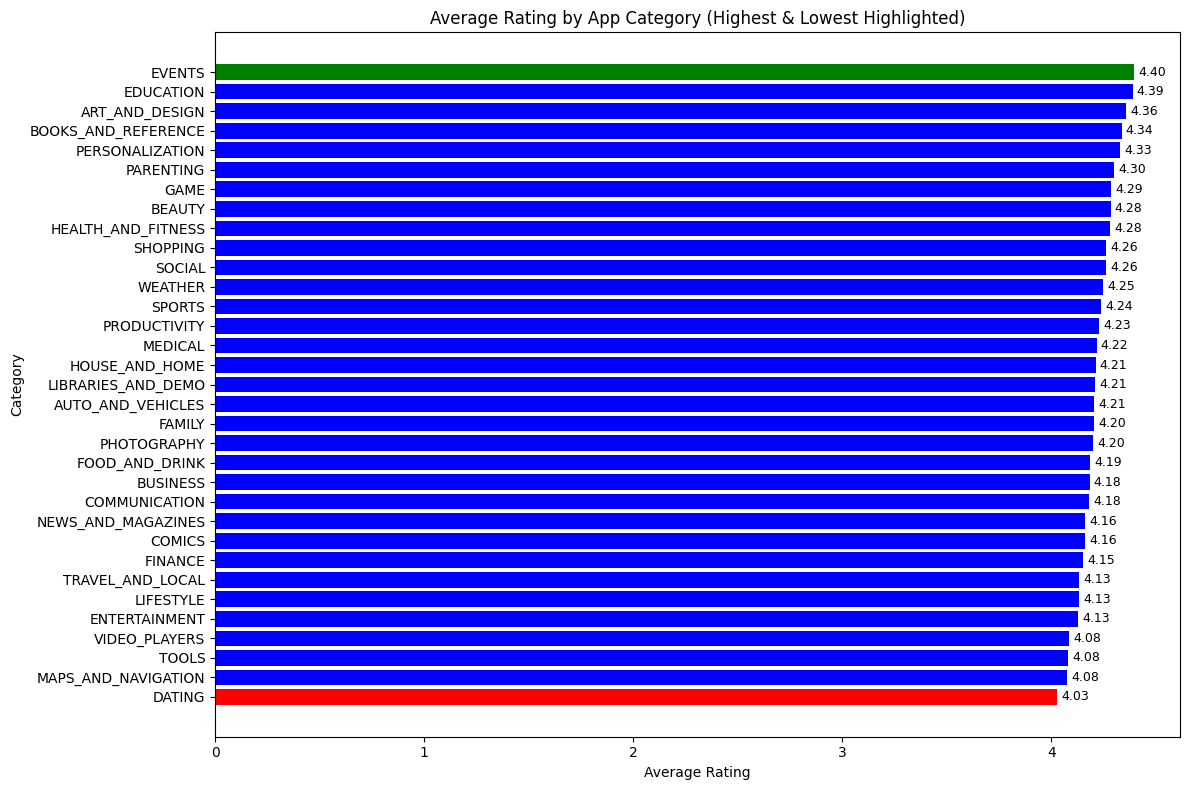

In [24]:
# Plot
# Identify highest and lowest
highest = category_ratings.index[0]
lowest = category_ratings.index[-1]

# Assign colors
colors = ['blue'] * len(category_ratings)  # default blue
colors[0] = 'green'   # highest category
colors[-1] = 'red'    # lowest category

plt.figure(figsize=(12, 8))
bars = plt.barh(category_ratings.index, category_ratings.values, color=colors)

# Value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.02,                     # position slightly outside bar
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}",
        va='center',
        fontsize=9
    )

plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Average Rating by App Category (Highest & Lowest Highlighted)")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

Question 8: Titanic Dataset a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git (Include your Python code and output in the code box below.)



Answer :

2. Which class had the highest survival rate, and why did that happen?

The 1st class passengers had the highest survival rate.
This happened because:

Proximity to lifeboats: First-class cabins were located on the upper decks, very close to the lifeboat areas, which allowed faster evacuation.

Higher social status: Crew members prioritized wealthy passengers during the rescue, reflecting social inequality at the time.

Better access to information: First-class passengers received instructions earlier and more directly.

Fewer physical barriers: Third-class passengers faced locked gates, crowded corridors, and more difficulty reaching the upper decks.

As a result, first-class passengers had the highest likelihood of survival, while third-class passengers had the lowest.

 c) Did children have a better chance of survival?

Yes, children had a noticeably better chance of survival compared to adults.
Children benefited from the “women and children first” evacuation policy, which gave them priority access to lifeboats. Since lifeboat space was limited, adults—especially adult males—were often instructed to wait or were not allowed to board early. Additionally, many children were traveling with mothers in higher classes (1st and 2nd), where survival rates were already higher.

Because of these factors, the survival rate for children was significantly higher than that of adults.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv('titanic.csv')

In [37]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [42]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


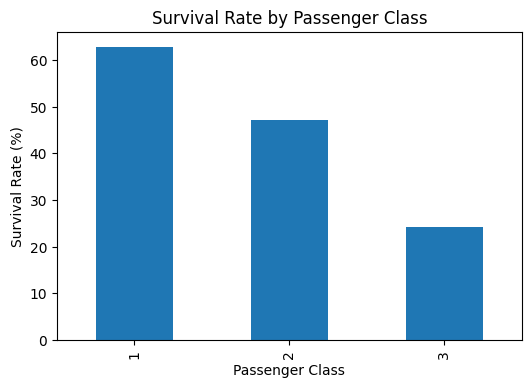

In [43]:
survival_by_class.plot(kind='bar', figsize=(6,4))
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Passenger Class")
plt.show()

In [44]:
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [48]:
df['Age'].isna().sum()

np.int64(0)

In [49]:
# Create age groups
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Calculate survival rate
survival_by_age_group = df.groupby('Age_Group')['Survived'].mean() * 100
print(survival_by_age_group)


Age_Group
Adult    36.118252
Child    53.982301
Name: Survived, dtype: float64


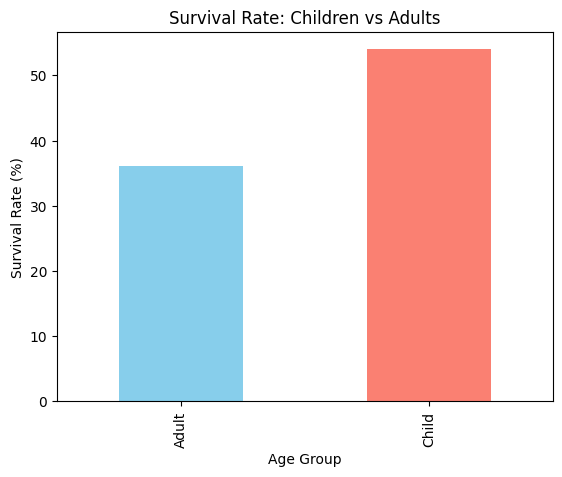

In [50]:
survival_by_age_group.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Survival Rate: Children vs Adults")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Age Group")
plt.show()

Question 9: Flight Price Prediction Dataset
a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.
b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why?
Dataset: https://github.com/MasteriNeuron/datasets.git (Include your Python code and output in the code box below.)

Answer: Flight prices show a strong inverse relationship with the number of days left until departure. When there are more days left (20–35 days), prices remain low and stable, as airlines still have many seats available and use competitive pricing. As the departure date gets closer, prices begin to rise due to increasing demand and fewer available seats. The most significant change occurs in the last 0–7 days, where prices surge exponentially—often increasing by 30–50%—because airlines target last-minute travelers who are less price-sensitive. Therefore, the fewer days left until departure, the higher and more unpredictable the flight price becomes.

Identify any exponential price surges and recommend the best booking window
1. Exponential Price Surge (Last-Minute Booking)

Your line plot shows that:

When days_left is between 0–5 days,
the average price jumps sharply to ₹28,000 – ₹31,000+ → this is a clear exponential surge.

This happens because:

Last-minute travelers (business, emergencies) are less price-sensitive.

Airlines know this and push prices up aggressively.

Most low-fare seats are already sold out.

2. Medium Surge (7–15 Days Left)

From 7 to ~15 days, prices remain high (₹23,000–₹26,000 range).

This is because:

Many fare classes close.

Airlines start dynamic pricing as the flight date approaches.

3. Stable & Lowest Price Region (BEST time to book)

From the line chart:

Between 20–35 days left, prices stabilize around ₹19,000–₹20,000.

After 40–50 days left, prices stay fairly low and consistent.

This is the cheapest price region


b.)

The analysis of average ticket prices shows a clear distinction between low-cost and premium airlines. AirAsia, IndiGo, and SpiceJet consistently emerge as the cheapest carriers, reflecting their low-cost business models that focus on basic services, high aircraft utilization, and additional revenue through optional add-ons such as meals, baggage, and seat selection. These airlines keep operational costs low, allowing them to offer competitive fares across routes. GO_FIRST falls in the mid-range category, offering moderate pricing with a balance between cost and service. In contrast, Vistara and Air India are significantly more expensive, positioning themselves as premium full-service carriers. Their higher prices can be attributed to added service features such as complimentary meals, better seating comfort, free baggage allowance, and availability of business-class cabins. These airlines target corporate and higher-income travelers who are less price-sensitive. Overall, the pricing differences across airlines are strongly influenced by their service offerings, operational strategies, and target customer segments.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('flight_price.csv')

In [5]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [10]:
df


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


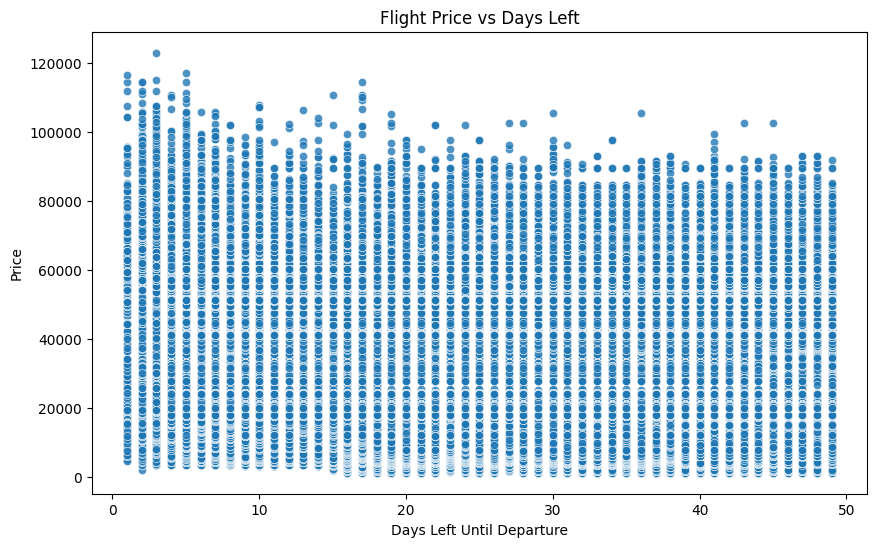

In [11]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='days_left', y='price', alpha=0.8)
plt.title("Flight Price vs Days Left")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Price")
plt.show()

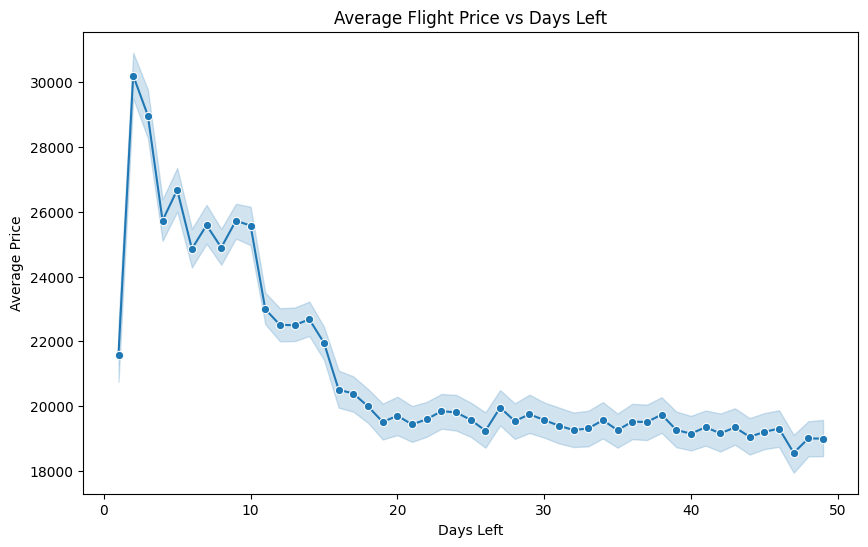

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='days_left', y='price', estimator='mean',marker='o')
plt.title("Average Flight Price vs Days Left")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.show()


In [14]:
route_df = df[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')]


In [15]:
route_df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
route_df.groupby('airline')['price'].mean().sort_values()


,price
airline,
AirAsia,3981.191456
Indigo,4473.739130
SpiceJet,4628.251984
GO_FIRST,5762.211515
Air_India,23695.916916
Vistara,26630.293322


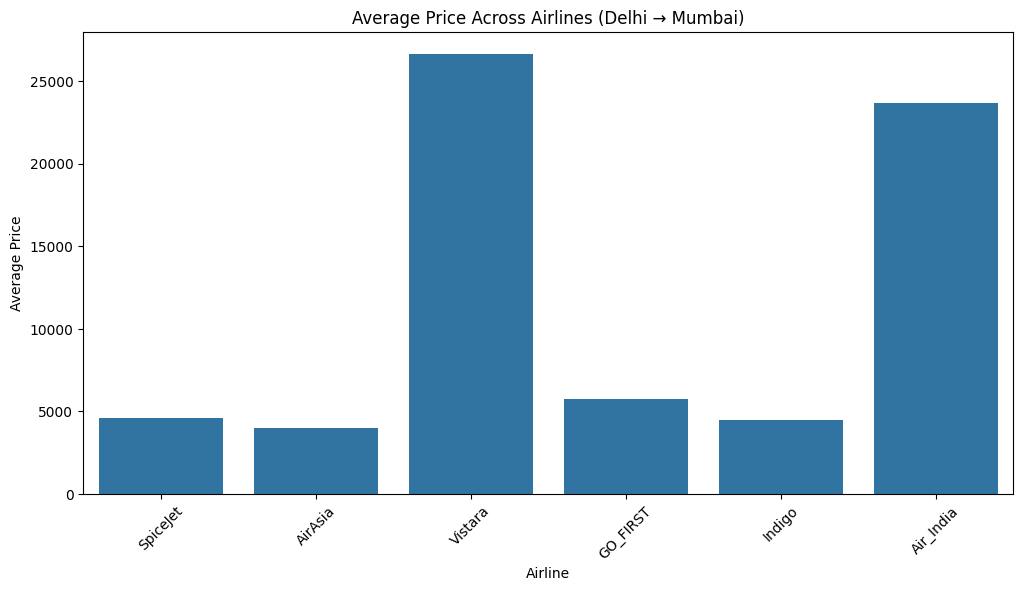

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=route_df, x='airline', y='price', estimator='mean', errorbar=None)
plt.title('Average Price Across Airlines (Delhi → Mumbai)')
plt.ylabel('Average Price')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

Question 10: HR Analytics Dataset
a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).

b). Are employees with more projects more likely to leave?


Answer:-

Employee attrition in this dataset is most strongly driven by low satisfaction levels, which show the highest negative correlation with whether an employee stays. Employees who leave also tend to work longer monthly hours, suggesting burnout. Attrition is significantly higher among employees who have spent 4 or more years in the company, indicating possible stagnation or lack of career progression. Salary plays an important role: low-salary employees are most likely to leave, while high-salary employees rarely quit. Together, low satisfaction, high workload, longer tenure without growth, and low salary are the key factors contributing to employee attrition.

b.)

Yes, employees with more projects are significantly more likely to leave. The attrition rate increases sharply for employees handling 6 or 7 projects, suggesting that excessive workload and burnout drive resignations. Employees with a moderate number of projects (3–4) are the most stable, while those with very few projects (2 or fewer) also show elevated attrition, likely due to lack of engagement or growth opportunities. Overall, both underworking and overworking contribute to employee turnover, but overworking is the strongest driver of attrition in this dataset.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('hr_analytics.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [27]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [28]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [29]:
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


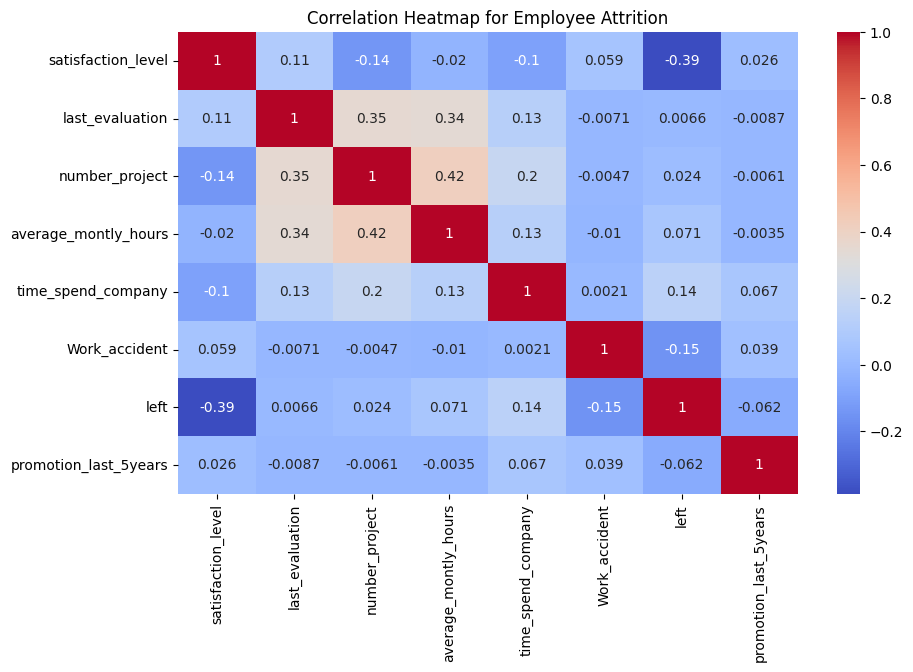

In [35]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Employee Attrition")
plt.show()

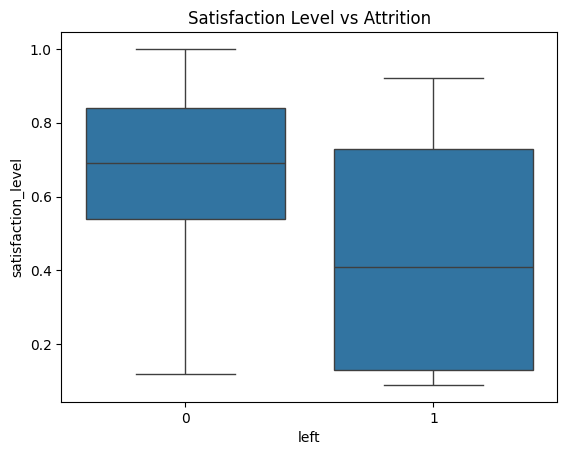

In [31]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction Level vs Attrition")
plt.show()


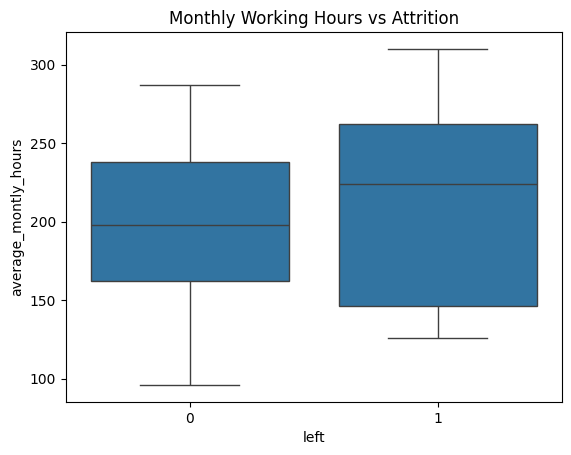

In [32]:
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title("Monthly Working Hours vs Attrition")
plt.show()


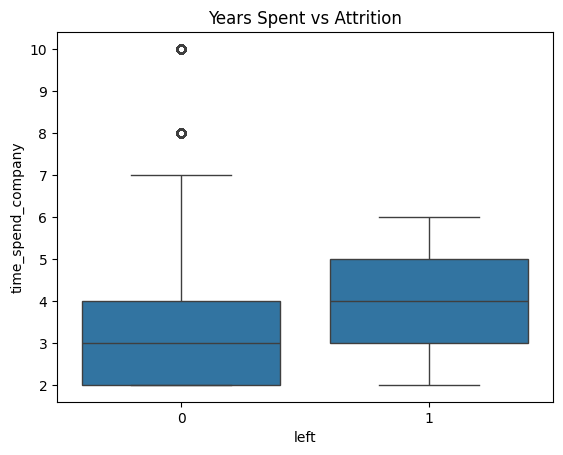

In [33]:
sns.boxplot(x='left', y='time_spend_company', data=df)
plt.title("Years Spent vs Attrition")
plt.show()


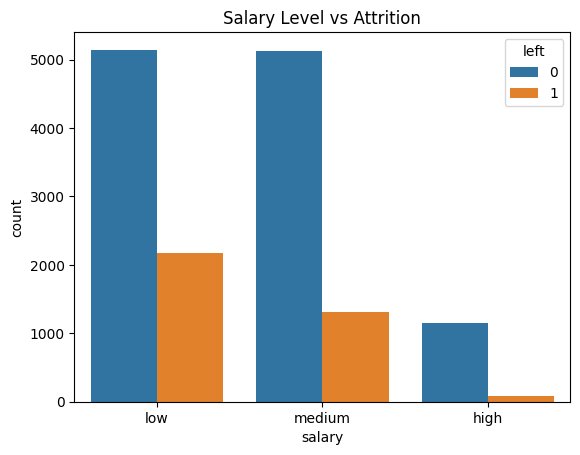

In [34]:
sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary Level vs Attrition")
plt.show()


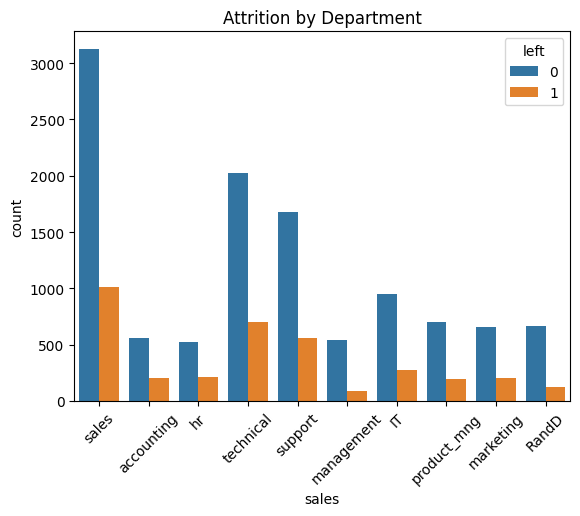

In [37]:
sns.countplot(x='sales', hue='left', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Department")
plt.show()


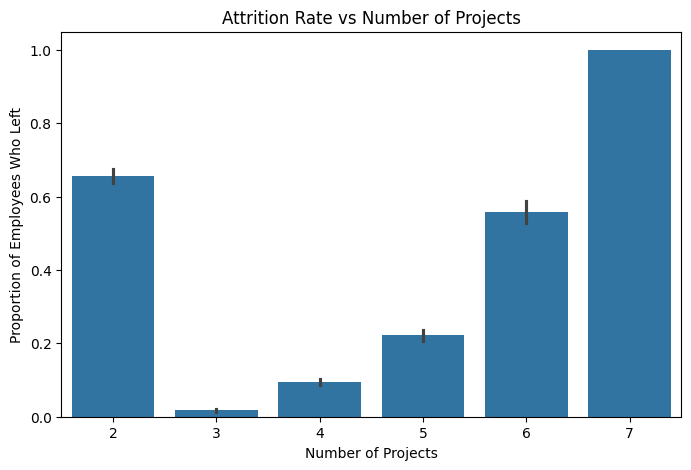

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='number_project', y='left', data=df, estimator='mean')
plt.title("Attrition Rate vs Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

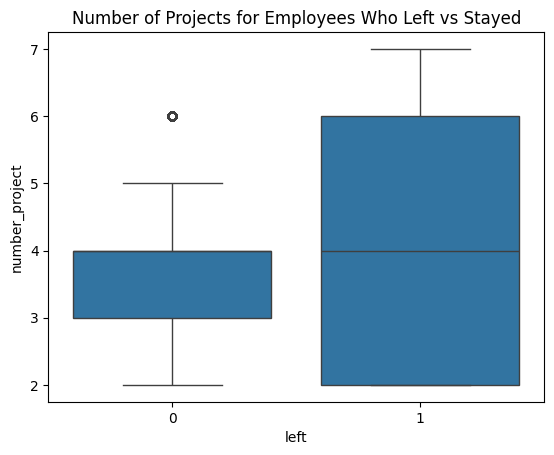

In [39]:
sns.boxplot(x='left', y='number_project', data=df)
plt.title("Number of Projects for Employees Who Left vs Stayed")
plt.show()
